In [5]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
df_encoded = df_processed.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
corr_matrix = df_encoded.corr()

In [4]:
import pandas as pd

df = pd.read_csv("C:/Users/William Kelley/Desktop/HeartProject/heart.csv")
print(df.head())
df_processed = pd.read_csv('C:/Users/William Kelley/Desktop/HeartProject/heart.csv')


print("\nMissing values in each column:")
print(df.isnull().sum())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina 

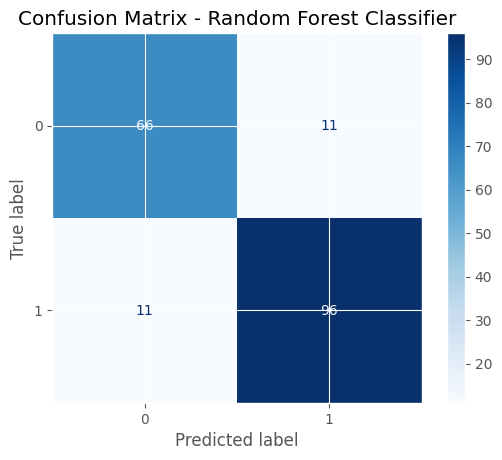

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/William Kelley/Desktop/HeartProject/heart.csv'
heart_data = pd.read_csv(file_path)

# Encode categorical features
encoder = LabelEncoder()
heart_data['Sex'] = encoder.fit_transform(heart_data['Sex'])
heart_data['ChestPainType'] = encoder.fit_transform(heart_data['ChestPainType'])
heart_data['RestingECG'] = encoder.fit_transform(heart_data['RestingECG'])
heart_data['ExerciseAngina'] = encoder.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = encoder.fit_transform(heart_data['ST_Slope'])

# Define features and target
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
rf_pred = rf_classifier.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


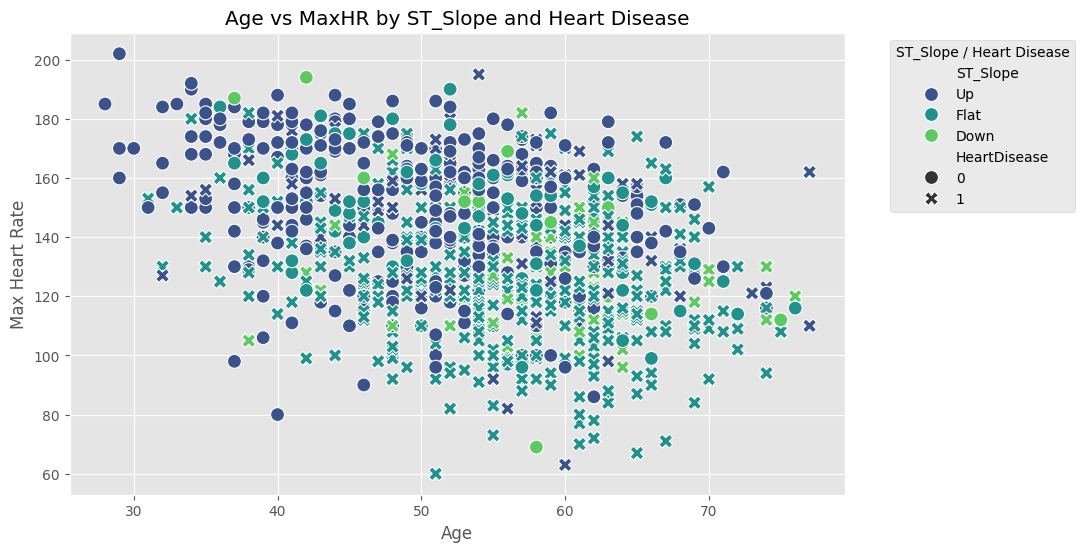

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MaxHR', hue='ST_Slope', style='HeartDisease', data=df_processed, palette='viridis', s=100)
plt.title('Age vs MaxHR by ST_Slope and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='ST_Slope / Heart Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

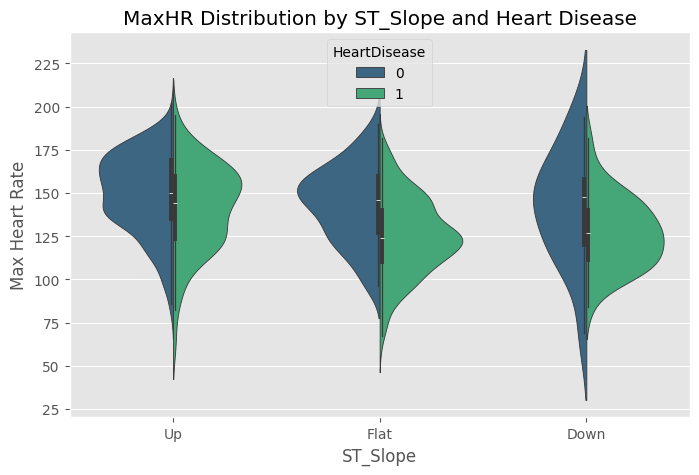

In [8]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='ST_Slope', y='MaxHR', hue='HeartDisease', data=df_processed, split=True, palette='viridis')
plt.title('MaxHR Distribution by ST_Slope and Heart Disease')
plt.xlabel('ST_Slope')
plt.ylabel('Max Heart Rate')
plt.show()


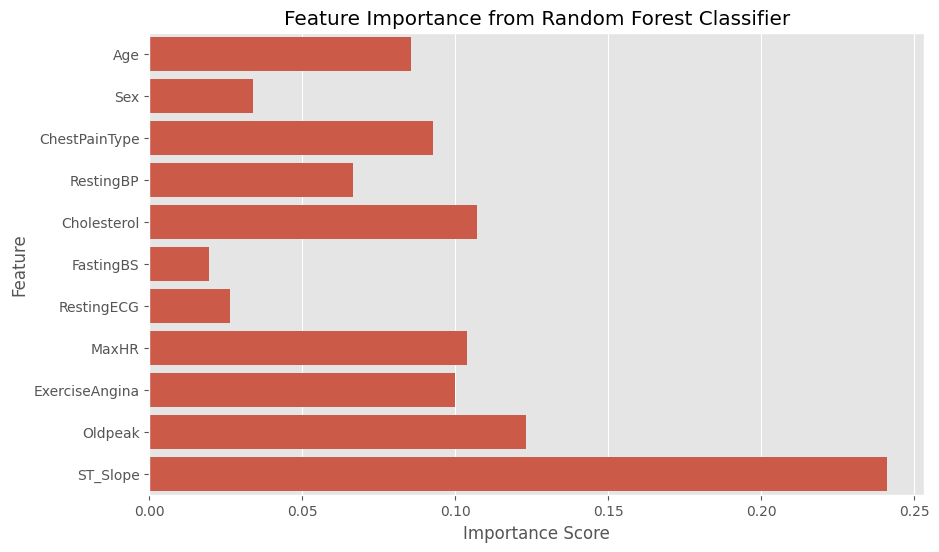

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/William Kelley/Desktop/HeartProject/heart.csv'
heart_data = pd.read_csv(file_path)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
heart_data['Sex'] = encoder.fit_transform(heart_data['Sex'])
heart_data['ChestPainType'] = encoder.fit_transform(heart_data['ChestPainType'])
heart_data['RestingECG'] = encoder.fit_transform(heart_data['RestingECG'])
heart_data['ExerciseAngina'] = encoder.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = encoder.fit_transform(heart_data['ST_Slope'])

# Define features and target
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_classifier.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance from Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

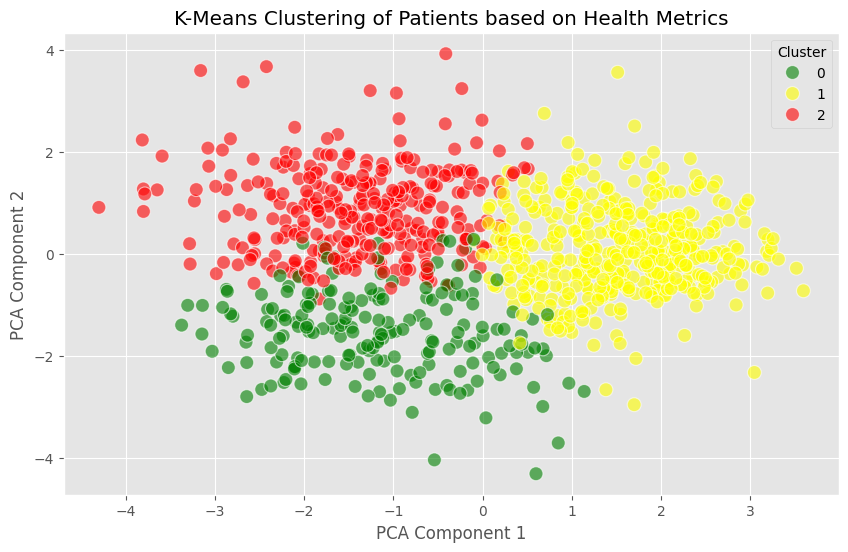

Cluster Summary:
               Age       Sex  ChestPainType   RestingBP  Cholesterol  \
Cluster                                                                
0        57.879581  0.952880       0.602094  131.931937    44.460733   
1        49.372038  0.668246       1.215640  128.798578   237.125592   
2        56.501639  0.855738       0.291803  137.665574   242.422951   

         FastingBS  RestingECG       MaxHR  ExerciseAngina   Oldpeak  \
Cluster                                                                
0         0.638743    1.293194  120.083770        0.434555  0.732984   
1         0.092417    0.888626  152.222749        0.054502  0.331280   
2         0.173770    0.937705  125.957377        0.868852  1.753443   

         ST_Slope  HeartDisease  
Cluster                          
0        1.141361      0.858639  
1        1.763033      0.187204  
2        0.944262      0.868852  


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'C:/Users/William Kelley/Desktop/HeartProject/heart.csv'
heart_data = pd.read_csv(file_path)

# Encode categorical features
encoder = LabelEncoder()
heart_data['Sex'] = encoder.fit_transform(heart_data['Sex'])
heart_data['ChestPainType'] = encoder.fit_transform(heart_data['ChestPainType'])
heart_data['RestingECG'] = encoder.fit_transform(heart_data['RestingECG'])
heart_data['ExerciseAngina'] = encoder.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = encoder.fit_transform(heart_data['ST_Slope'])

# Define features
X = heart_data.drop('HeartDisease', axis=1)

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
heart_data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Assign custom colors for the clusters
cluster_colors = ['green', 'yellow', 'red']  # Low Risk (Green), Moderate Risk (Yellow), High Risk (Red)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette=cluster_colors, s=100, alpha=0.6, edgecolor='w')
plt.title("K-Means Clustering of Patients based on Health Metrics")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

cluster_summary = heart_data.groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)


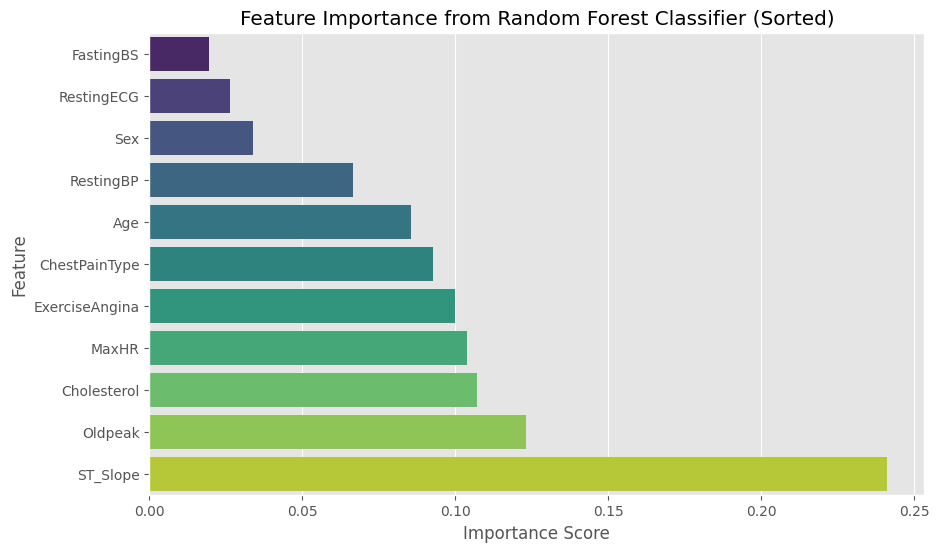

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/William Kelley/Desktop/HeartProject/heart.csv'
heart_data = pd.read_csv(file_path)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
heart_data['Sex'] = encoder.fit_transform(heart_data['Sex'])
heart_data['ChestPainType'] = encoder.fit_transform(heart_data['ChestPainType'])
heart_data['RestingECG'] = encoder.fit_transform(heart_data['RestingECG'])
heart_data['ExerciseAngina'] = encoder.fit_transform(heart_data['ExerciseAngina'])
heart_data['ST_Slope'] = encoder.fit_transform(heart_data['ST_Slope'])

# Define features and target
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for sorting feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importance sorted from least to greatest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title("Feature Importance from Random Forest Classifier (Sorted)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='ST_Slope', data=heart_data, palette=cluster_colors)
plt.title("Distribution of ST_Slope across Clusters")
plt.xlabel("Cluster (Low Risk, Moderate Risk, High Risk)")
plt.ylabel("ST_Slope Value")
plt.xticks(ticks=[0, 1, 2], labels=['Low Risk', 'Moderate Risk', 'High Risk'])
plt.show()

ValueError: Could not interpret value `Cluster` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>